# The Economic Effects of COVID-19

Econ 126 - Python for Macroeconomics

Group Project #1 
By: Amanda Lin, Tae Young Lee, Harshal Shah, Sara Tang

In [1]:
pip install fredpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import fredpy as fp
from matplotlib.dates import date2num
from datetime import datetime 

# CPI & PCE

In [3]:
# Save the API key in the fp namespace
fp.api_key = 'e0eed17e3ffc9b62c4b17daaf7b477d6'

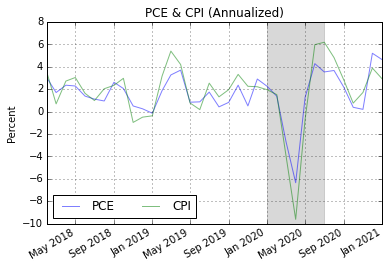

In [4]:
# Download PCEPI and CPI data from 2018-01-01 to 2021-01-01
pce = fp.series('PCEPI')
pce = pce.window(['2018-01-01','2021-01-01'])
# calculate pce inflation
pce = pce.pc()

cpi = fp.series('CPIAUCSL')
cpi = cpi.window(['2018-01-01','2021-01-01'])
# calculate cpi inflation
cpi = cpi.pc()


# Graph PCE inflation and CPI inflation
plt.plot(pce.data*12, alpha = 0.5, label = 'PCE')
plt.plot(cpi.data*12,alpha = 0.5, label = 'CPI')
plt.legend(loc = 'lower left', ncol = 2)
plt.grid()
plt.gcf().autofmt_xdate()
plt.ylabel('Percent')
plt.title('PCE & CPI (Annualized)')
plt.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2020,6,30)),color="gray",alpha=0.3)

# Real GDP & Personal Saving

In [5]:
#save the API key in the fp namespace
fp.api_key = "b6df57d4210944133cc1af6ccf5dd7dc"
rgdp = fp.series("GDPC1")

#download real GDP data from 2018-01-01 to 2021-01-01
rgdp = rgdp.window(['2018-01-01','2021-01-01'])

#download real PCE data from 2018-01-01 to 2021-01-01
psave = fp.series("PMSAVE")
psave = psave.window(['2018-01-01','2021-01-01'])

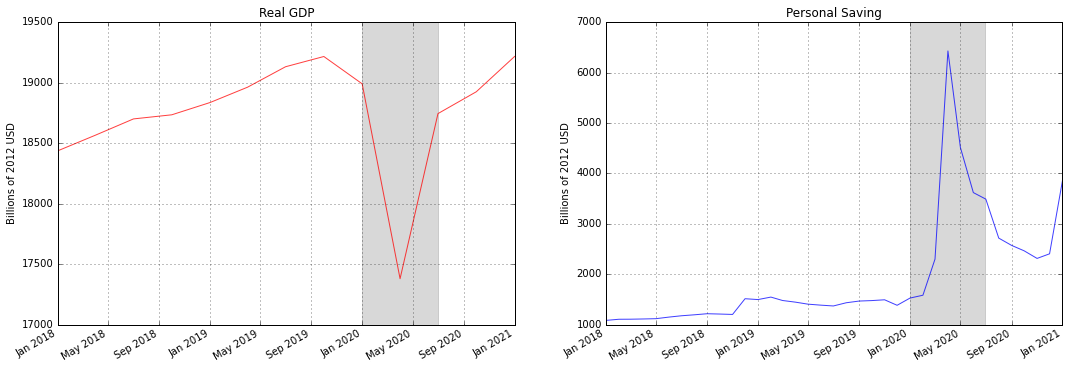

In [6]:
fig = plt.figure(figsize=(18,6))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(rgdp.data, "r", lw = 1, alpha = 0.75, label = 'Real GDP')
ax1.set_ylabel('Billions of 2012 USD')
ax1.set_title('Real GDP')
plt.gcf().autofmt_xdate()
ax1.grid()

ax2.plot(psave.data, "b", lw = 1, alpha = 0.75, label = 'Personal Saving')
ax2.set_ylabel('Billions of 2012 USD')
ax2.set_title('Personal Saving')
ax2.grid()
ax1.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2020,6,30)),color="gray",alpha=0.3)
ax2.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2020,6,30)),color="gray",alpha=0.3);

# Umeployment Rate & Trend

In [7]:
fp.api_key = '22005e74d542dea7e2a61cee72dad0bb'

In [8]:
#Download data from 2018-01-01 to 2022-01-01
unemp = fp.series('UNRATE')
unemp = unemp.window(['2018-01-01','2022-01-01'])

#Calculate the montly % change of unemployment rate
unemp_change = unemp.pc()

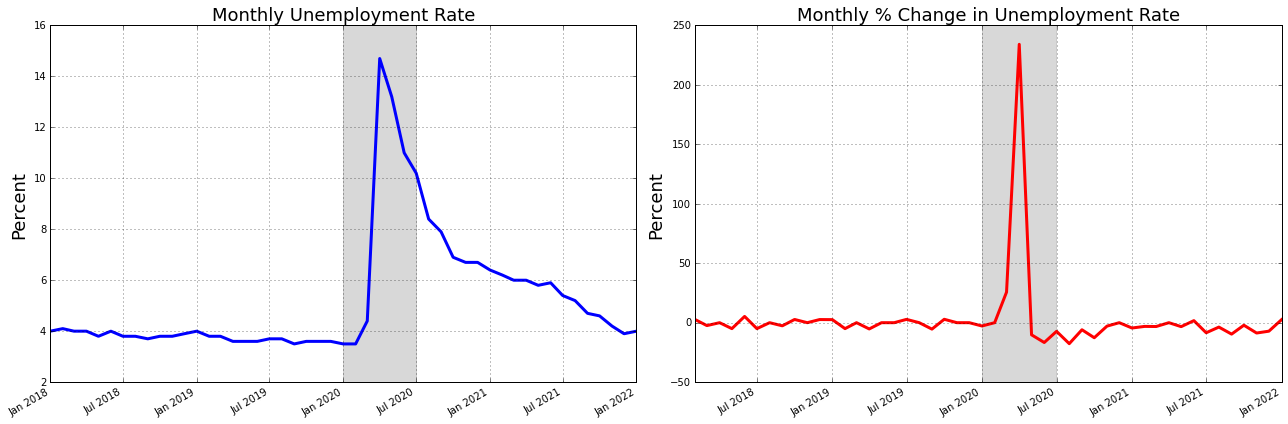

In [9]:
#Graph Montly unemployment rate
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(unemp.data, lw=3)
ax1.set_ylabel('Percent',fontsize=18)
ax1.set_title('Monthly Unemployment Rate',fontsize=18)

#Shade the region during major covid effects
ax1.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2020,6,30)), color="gray", alpha=0.3)
ax1.grid()

#Graph monthly % change in unemployment rate.
ax2 = fig.add_subplot(1,2,2)
ax2.plot(unemp_change.data,'r', lw=3)
ax2.set_ylabel('Percent', fontsize=18)
ax2.set_title('Monthly % Change in Unemployment Rate',fontsize=18)

#Shade the region during major covid effects
ax2.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2020,6,30)), color="gray", alpha=0.3)
ax2.grid()

# Auto-rotate the x-axis labels
fig.autofmt_xdate()

fig.tight_layout();

# Effective Fed Fund Rate & Money Stock

In [10]:
fp.api_key = '85498a7e0c83846d2c08c0710e6be0fe'

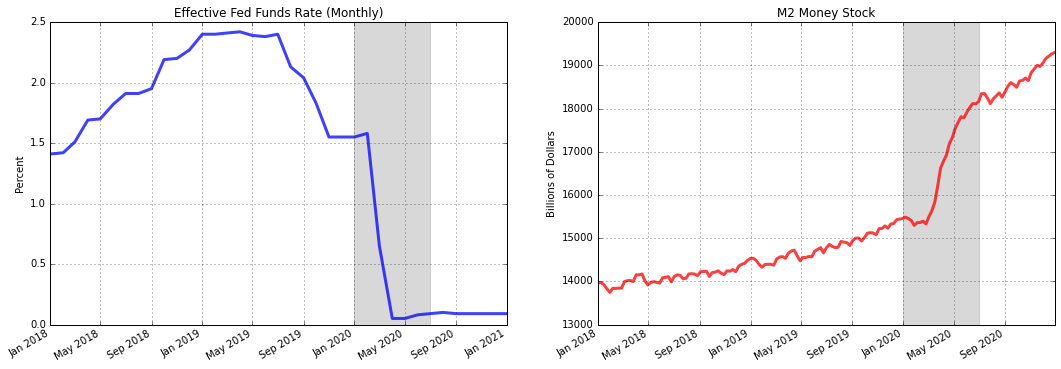

In [11]:
#Download Effective Fed Fund Rate and M2 Money Stock Data from FRED from 2018-01-01 to 2021-01-01
fedf = fp.series('FEDFUNDS')
fedf = fedf.window(['2018-01-01','2021-01-01'])
m2 = fp.series('WM2NS')
m2 = m2.window(['2018-01-01','2021-01-01'])

#Insert (18,6) figure
fig = plt.figure(figsize=(18,6))

#Graph Effective Fed Fund Rate and M2 Money Stock, set appropriate lables, and add a grid.
ax1 = fig.add_subplot(1,2,1)
ax1.plot(fedf.data,lw=3,alpha=0.75)
ax1.set_ylabel('Percent')
ax1.set_title('Effective Fed Funds Rate (Monthly)')
ax1.grid()
ax2 = fig.add_subplot(1,2,2)
ax2.plot(m2.data,'r',lw=3,alpha=0.75)
ax2.set_ylabel('Billions of Dollars')
ax2.set_title('M2 Money Stock')
ax2.grid()

#Use autofmt_xdate() to formate the x-axis dates
fig.autofmt_xdate()

#Shade the region during major COVID-19 events
ax1.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2020,6,30)),color="gray",alpha=0.3)
ax2.axvspan(date2num(datetime(2020,1,1)), date2num(datetime(2020,6,30)),color="gray",alpha=0.3);